# Gardient Descent

- Gradient Descent is an optimization algorithm used for minimizing the cost function in various machine learning algorithms. It is basically used for updating the parameters of the learning model.

- Lets i give you a example :  Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once the gra‐ dient is zero, you have reached a minimum!
  <img src="1.png">

   

## Steps of gradient descent

Following the mountain example, In each position, the agent only knows two things:

- the gradient (for that position, or parameters) and the width of the step to take (learning rate). 

- With that information, the current value of each parameter is updated. With the new parameter values, the gradient is re-calculated and the process is repeated until reach convergence or local minima.

- Let’s revise how the gradient descent algorithm works at each step:

Repeat until hit convergence:

1. Given the gradient, calculate the change in the parameters with the learning rate.
2. Re-calculate the new gradient with the new value of the parameter.
3. Repeat step 1.

Here is the formula of gradient descent algorithm:
<img src="3.png" width=250>

Convergence is a name given to the situation where the loss function does not improve significantly, and we are stuck in a point near to the minima.

### Types of gradient Descent:

1. Batch Gradient Descent: This is a type of gradient descent which processes all the training examples for each iteration of gradient descent. But if the number of training examples is large, then batch gradient descent is computationally very expensive. Hence if the number of training examples is large, then batch gradient descent is not preferred. Instead, we prefer to use stochastic gradient descent or mini-batch gradient descent.


2. Stochastic Gradient Descent: This is a type of gradient descent which processes 1 training example per iteration. Hence, the parameters are being updated even after one iteration in which only a single example has been processed. Hence this is quite faster than batch gradient descent. But again, when the number of training examples is large, even then it processes only one example which can be additional overhead for the system as the number of iterations will be quite large.


3. Mini Batch gradient descent: This is a type of gradient descent which works faster than both batch gradient descent and stochastic gradient descent. Here b examples where b<m are processed per iteration. So even if the number of training examples is large, it is processed in batches of b training examples in one go. Thus, it works for larger training examples and that too with lesser number of iterations.



### Convergence trends in different variants of Gradient Descents:

In case of Batch Gradient Descent, the algorithm follows a straight path towards the minimum.If the cost function is convex, then it converges to a global minimum and if the cost function is not convex, then it converges to a local minimum. Here the learning rate is typically held constant.


In case of stochastic gradient Descent and mini-batch gradient descent, the algorithm does not converge but keeps on fluctuating around the global minimum. Therefore in order to make it converge, we have to slowly change the learning rate. However the convergence of Stochastic gradient descent is much noisier as in one iteration, it processes only one training example.

## Here I show Gradient Descent In Linear Regression

 In linear regression, the model targets to get the best-fit regression line to predict the value of y based on the given input value (x). While training the model, the model calculates the cost function which measures the Root Mean Squared error between the predicted value (pred) and true value (y). The model targets to minimize the cost function. 
 
 To minimize the cost function, the model needs to have the best value of pred and y. Initially model selects m and c values randomly and then itertively update these value in order to minimize the cost function untill it reaches the minimum. 
 
 By the time model achieves the minimum cost function, it will have the best pred and y values. Using these finally updated values of pred and y in the hypothesis equation of linear equation, model predicts the value of y in the best manner it can. 
 
 ##<img src="3.jpg" width=300>
    <img src="4.jpg" width=300>
 
 ### Gradient Descent Algorithm For Linear Regression 
 
 <img src="6.jpg" width=500>
 
Where 

-> θj     : Weights of the hypothesis.

-> hθ(xi) : predicted y value for ith input.

-> j     : Feature index number (can be 0, 1, 2, ......, n).

-> i     : Learning Rate of Gradient Descent.


## Now Time To Implement

In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [2]:
# Preprocessing Input data
cols = ['a','b']
data = pd.read_csv('data.csv',header=None,names=cols)

In [3]:
data.head()

,a,b
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [4]:
x = data.drop('b',axis=1)
y = data['b']

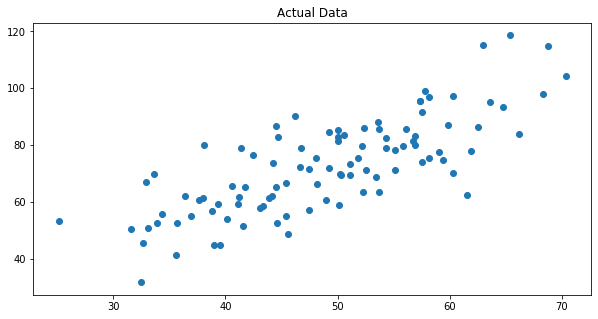

In [5]:
plt.scatter(x, y)
plt.title('Actual Data')
plt.show()

In [6]:
##Simple Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [7]:
y_pred_lr= lr.predict(x)

In [8]:
print("Intercept is",lr.intercept_)
print("Coeficient is",lr.coef_[0])

Intercept is 7.991020982270399
Coeficient is 1.3224310227553597


## Useing Gradient Descent

In [9]:
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

In [10]:
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
# print (m, c)
print("Intercept is",m)
print("Coeficient is",c)

Intercept is 1.4777440851894448
Coeficient is 0.08893651993741342


In [11]:
# Making predictions
Y_pred = m*X + c

## See Result In Graph

--------------- Without Gradient Decsent --------------------


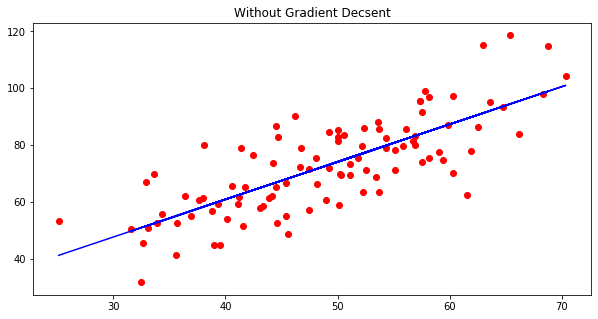

--------------- With Gradient Decsent --------------------


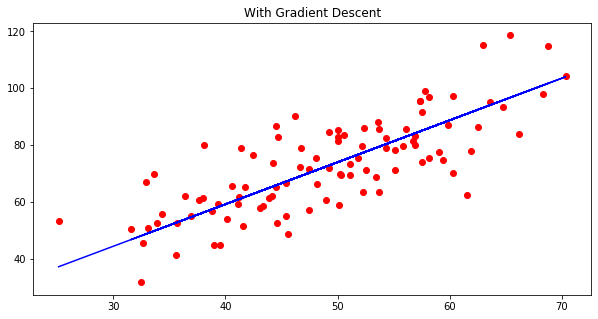

In [12]:
print("--------------- Without Gradient Decsent --------------------")
plt.scatter(x,y, color = 'red')
plt.plot(x, lr.predict(x), color = 'blue')
plt.title("Without Gradient Decsent")
plt.show()

print("--------------- With Gradient Decsent --------------------")
plt.scatter(X,Y, color = 'red')
plt.plot(X, Y_pred, color = 'blue')
plt.title("With Gradient Descent")
plt.show()
